<a href="https://colab.research.google.com/github/Rabbiya-tabassum/forest_regressor/blob/main/Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
df = fetch_california_housing()

There are two main types of linear regression:

Simple linear regression: This involves predicting a dependent variable based on a single independent variable.
Multiple linear regression: This involves predicting a dependent variable based on multiple independent variables.

In [2]:
# prompt: import califirnia data set

from sklearn.datasets import fetch_california_housing




The California housing dataset in scikit-learn (sklearn.datasets.fetch_california_housing) is typically returned as a dictionary-like object rather than a Pandas DataFrame. This dataset is often used for regression tasks.

When you fetch the California housing dataset using scikit-learn, you get a dictionary-like object with the following structure:

data: This contains the feature matrix with each row corresponding to a data point and each column corresponding to a feature.

target: This contains the target variable (i.e., the median house value for California districts).

feature_names: This contains the names of the features (columns) in the feature matrix.

DESCR: This contains a description of the dataset.

In [3]:
df

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

If we see its a key value pair.  data, target, feature names are keys. Values are inside the keys. Features are also descibed here. Output is defined in target. target is the key and value is this key

Take the data from df and make a data frame

In [4]:
dataset = pd.DataFrame(df.data)
dataset

,0,1,2,3,4,5,6,7
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


setting column names in dataset usin the dictionar value od feature names in df

In [5]:
dataset.columns=df.feature_names
dataset


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [6]:
#independant features
X= dataset
Y=df.target
Y


array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894])

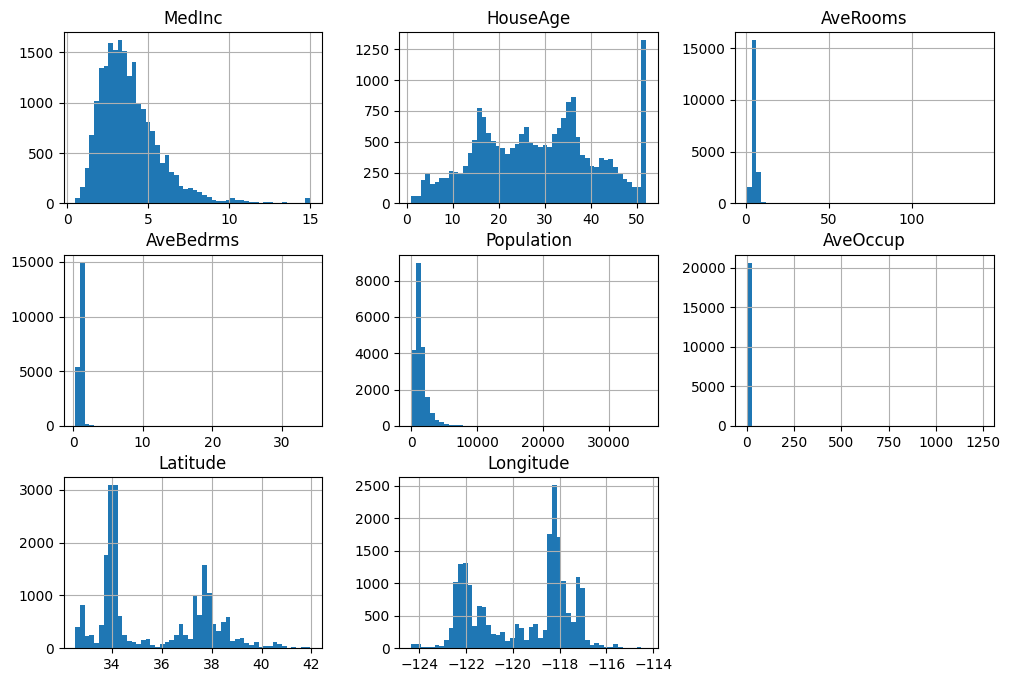

In [7]:
dataset.hist(bins=50, figsize=(12,8))
plt.show()

From the above histograms of the different features, we can conclude that:
1. Features are distributed on very different scales
2. In HouseAge and HouseValue columns the values are capped at 50 and 5 respectively.

For better accuracy, we should preprocess those features. We can either perform feature engineering or clean those problematic instances

In [8]:
from sklearn.model_selection import train_test_split
X_train , X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.20,random_state=42)

In [9]:
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()
X_train = scalar.fit_transform(X_train)
X_test = scalar.transform(X_test)

Output feature should not be transformed

In [10]:
from sklearn.linear_model import LinearRegression
regression = LinearRegression()
regression.fit(X_train,Y_train)
Y_pred=regression.predict(X_test)
from sklearn.metrics import r2_score
score = r2_score(Y_test,Y_pred)
score

0.575787706032451

In [12]:
from sklearn.metrics import r2_score
from sklearn.tree import DecisionTreeRegressor
regressor=DecisionTreeRegressor(random_state=0)
regressor.fit(X_train, Y_train)
y_pred = regressor.predict(X_test)
score = r2_score(Y_test, Y_pred)
print (score)


0.575787706032451


In [18]:
from sklearn.ensemble import RandomForestRegressor

#create a random forest regressor with 100 trees.....try changing estimator number
forest = RandomForestRegressor(n_estimators=9)
#fit the forest to the training set
forest.fit(X_train, Y_train)
#predict on the test set
Y_pred = forest.predict(X_test)
#evalute the performance
score = r2_score(Y_test, Y_pred)
print(score)

0.7833811445626878
